# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# load Data

In [2]:
train = pd.read_csv("/content/fraudTrain.csv")
test = pd.read_csv("/content/fraudTest.csv")

# Data exploration

In [3]:
train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [4]:
test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [5]:
print(train.shape)
print(test.shape)

(1296675, 23)
(555719, 23)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [8]:
a = train.isnull().sum()
a[a>0]

,0


In [9]:
b = train.isnull().sum()
b[b>0]

,0


In [10]:
print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


In [11]:
train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [12]:
test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

# data analysis

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

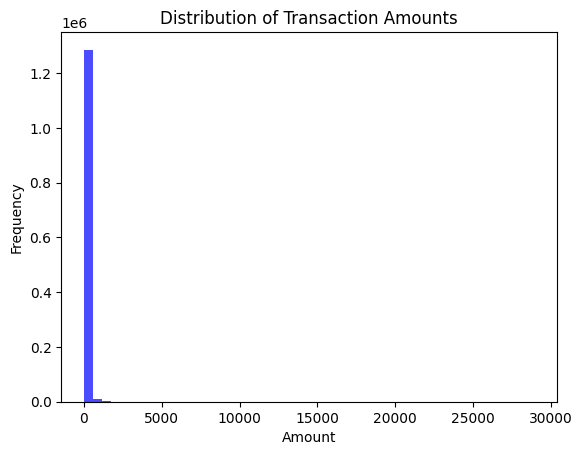

In [14]:
import matplotlib.pyplot as plt

plt.hist(train['amt'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


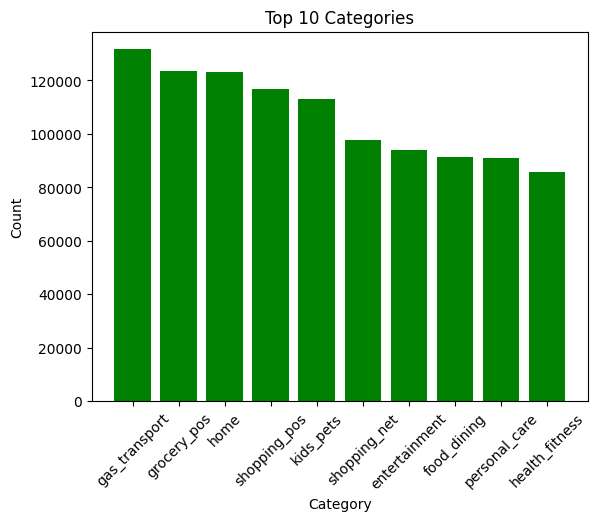

In [15]:
top_categories = train['category'].value_counts().head(10)
plt.bar(top_categories.index, top_categories.values, color='green')
plt.title('Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


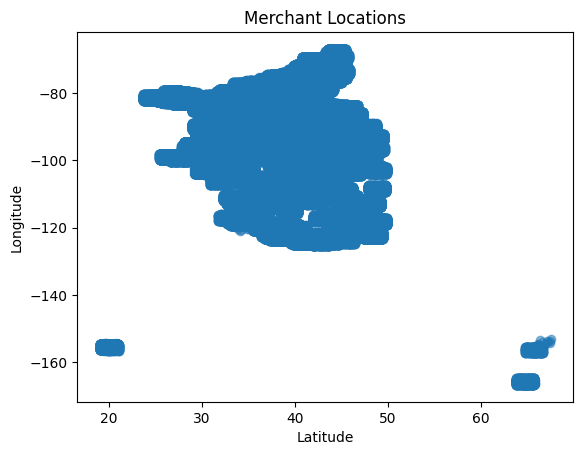

In [16]:
plt.scatter(train['merch_lat'], train['merch_long'], alpha=0.5)
plt.title('Merchant Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()


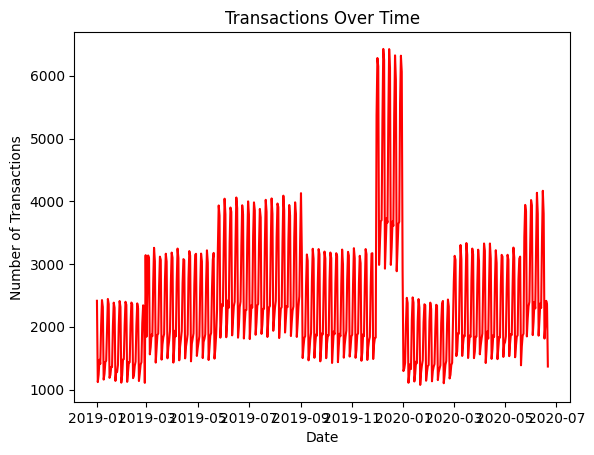

In [17]:
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
daily_transactions = train.groupby(train['trans_date_trans_time'].dt.date).size()
plt.plot(daily_transactions.index, daily_transactions.values, color='red')
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()


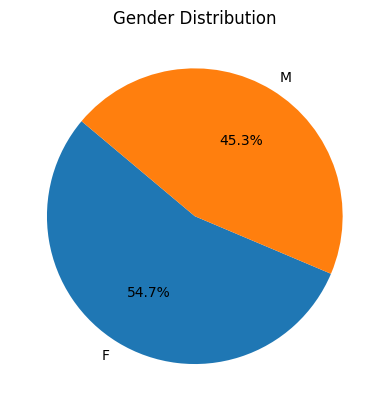

In [18]:
gender_distribution = train['gender'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()


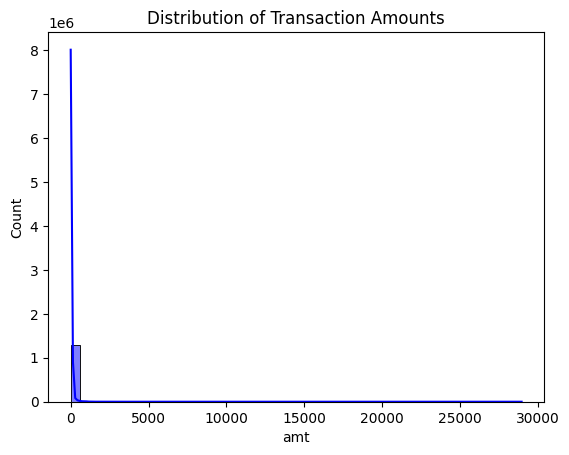

In [19]:
sns.histplot(train['amt'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.show()


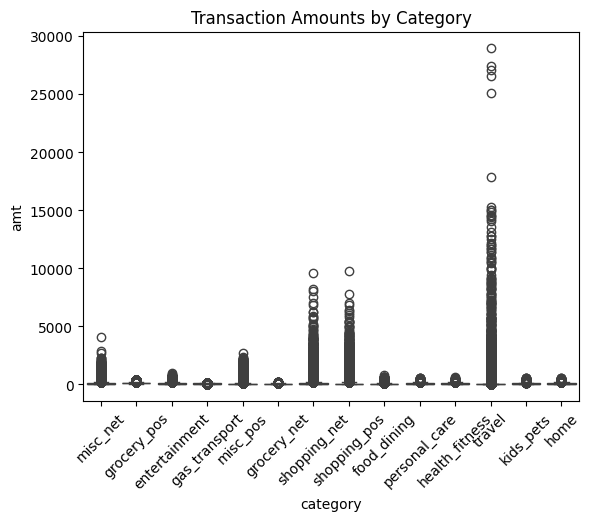

In [20]:
sns.boxplot(data=train, x='category', y='amt')
plt.title('Transaction Amounts by Category')
plt.xticks(rotation=45)
plt.show()


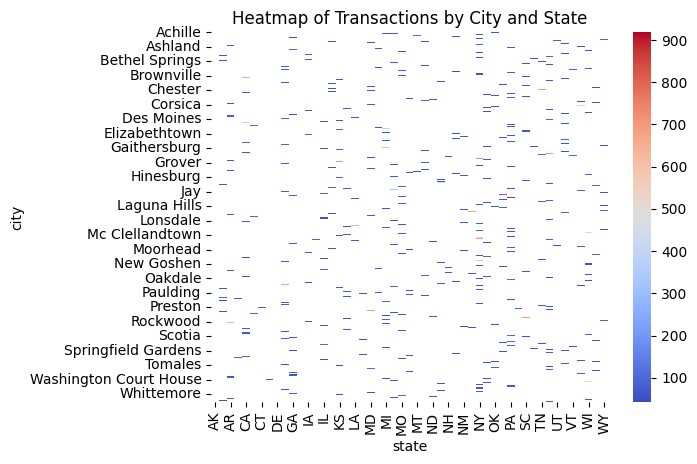

In [21]:
city_state_pivot = train.pivot_table(index='city', columns='state', values='amt', aggfunc='mean')
sns.heatmap(city_state_pivot, cmap='coolwarm')
plt.title('Heatmap of Transactions by City and State')
plt.show()


# Preparing data for the model

In [22]:
pd.set_option('display.max_columns', None)
train.sample(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
744866,744866,2019-11-14 23:17:17,4651007077623147,fraud_Ankunding-Carroll,travel,1.02,Andrea,Lewis,F,43075 Cohen Shoals,Ashford,WA,98304,46.7531,-121.9898,759,Video editor,1956-09-14,3c0d0f19a1b2b8a6b384dd8fc3e4d1b8,1352935037,46.084025,-121.813676,0
309339,309339,2019-05-30 01:19:01,4661996144291811856,fraud_Lynch Ltd,shopping_pos,5.12,Linda,Park,F,24607 Charles Mountains,Fenelton,PA,16034,40.8555,-79.7372,2054,Operations geologist,1963-08-04,92f1d39a8bfa6b29fcb0e1f2ef1ae547,1338340741,41.077146,-79.668742,0
776720,776720,2019-11-29 02:08:58,2283743876903625,"fraud_Ferry, Reichel and DuBuque",grocery_net,42.96,Shannon,Williams,F,9345 Spencer Junctions Suite 183,Alpharetta,GA,30009,34.0770,-84.3033,165556,Prison officer,1997-12-27,e2f8c8c543dc352320a880ddefb27521,1354154938,33.684497,-84.016925,0


In [23]:
print(train.pivot_table(index='category', values='is_fraud', aggfunc='mean'))

                is_fraud
category                
entertainment   0.002478
food_dining     0.001651
gas_transport   0.004694
grocery_net     0.002948
grocery_pos     0.014098
health_fitness  0.001549
home            0.001608
kids_pets       0.002114
misc_net        0.014458
misc_pos        0.003139
personal_care   0.002424
shopping_net    0.017561
shopping_pos    0.007225
travel          0.002864


In [24]:
train.value_counts('is_fraud')

,count
is_fraud,
0,1289169
1,7506


In [25]:
test.value_counts('is_fraud')

,count
is_fraud,
0,553574
1,2145


In [26]:
majority_class = train[train['is_fraud'] == 0]
minority_class = train[train['is_fraud'] == 1]

undersampled_majority = majority_class.sample(n=len(minority_class), random_state=42)

train = pd.concat([undersampled_majority, minority_class])
train = train.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Number of samples after processing: {len(train)}")
print(train['is_fraud'].value_counts())


Number of samples after processing: 15012
is_fraud
0    7506
1    7506
Name: count, dtype: int64


In [27]:
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from geopy.distance import geodesic

def preprocess_data(train):
    cols_to_drop = ['Unnamed: 0', 'cc_num', 'street', 'first', 'last', 'trans_num', 'merchant']
    train.drop(columns=cols_to_drop, inplace=True, errors='ignore')

    train['transaction_hour'] = train['trans_date_trans_time'].dt.hour
    train['transaction_dayofweek'] = train['trans_date_trans_time'].dt.dayofweek
    train['transaction_month'] = train['trans_date_trans_time'].dt.month

    current_year = datetime.now().year
    train['dob'] = pd.to_datetime(train['dob'], errors='coerce')
    train['age_at_transaction'] = current_year - train['dob'].dt.year
    train.drop(columns=['dob', 'trans_date_trans_time'], inplace=True, errors='ignore')

    label_cols = ['gender', 'state', 'city']  # ✅ أضف city هنا
    for col in label_cols:
        le = LabelEncoder()
        train[col] = le.fit_transform(train[col])

    train = pd.get_dummies(train, columns=['category', 'job'], drop_first=True)

    train['distance'] = train.apply(lambda row: geodesic((row['lat'], row['long']),
                                                         (row['merch_lat'], row['merch_long'])).km, axis=1)

    train.drop(columns=['lat', 'long', 'merch_lat', 'merch_long'], inplace=True, errors='ignore')

    return train

train = preprocess_data(train)


In [30]:
def preprocess_test_data(test, train_columns, train):
    test = test.copy()

    test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'], errors='coerce')

    test['transaction_hour'] = test['trans_date_trans_time'].dt.hour
    test['transaction_dayofweek'] = test['trans_date_trans_time'].dt.dayofweek
    test['transaction_month'] = test['trans_date_trans_time'].dt.month

    current_year = datetime.now().year
    test['dob'] = pd.to_datetime(test['dob'], errors='coerce')
    test['age_at_transaction'] = current_year - test['dob'].dt.year

    cols_to_drop = ['trans_date_trans_time', 'dob', 'city', 'zip', 'city_pop', 'unix_time']
    test.drop(columns=cols_to_drop, inplace=True, errors='ignore')

    label_cols = ['gender', 'state']
    for col in label_cols:
        le = LabelEncoder()
        le.fit(train[col].dropna().unique())
        test[col] = test[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

    test = pd.get_dummies(test, columns=['category', 'job'], drop_first=True)

    test['distance'] = test.apply(lambda row: geodesic((row['lat'], row['long']),
                                                        (row['merch_lat'], row['merch_long'])).km, axis=1)

    test.drop(columns=['lat', 'long', 'merch_lat', 'merch_long'], inplace=True, errors='ignore')

    test = test.reindex(columns=train_columns, fill_value=0)

    return test

test = preprocess_test_data(test, train.columns, train)


In [31]:
print(train.shape)
print(test.shape)

(15012, 518)
(555719, 518)


In [36]:
for col in train.select_dtypes(include=['bool']).columns:
    if col in test.columns:
        test[col] = test[col].astype(bool)
    else:
        test[col] = False

for col in train.select_dtypes(include=['int32']).columns:
    if col in test.columns:
        test[col] = test[col].astype('int32')

if 'object' in test.select_dtypes(include=['object']).columns:
    print(" There are object columns that need to be converted!")

print(train.dtypes.value_counts())
print(test.dtypes.value_counts())


bool       505
int64        7
int32        4
float64      2
Name: count, dtype: int64
bool       505
int64        7
int32        4
float64      2
Name: count, dtype: int64


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15012 entries, 0 to 15011
Columns: 518 entries, amt to distance
dtypes: bool(505), float64(2), int32(4), int64(7)
memory usage: 8.5 MB


In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Columns: 518 entries, amt to distance
dtypes: bool(505), float64(2), int32(4), int64(7)
memory usage: 314.3 MB


In [34]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Columns: 518 entries, amt to distance
dtypes: bool(505), float64(2), int32(4), int64(7)
memory usage: 314.3 MB


In [45]:
x = train.drop(columns=['is_fraud'])
y = train['is_fraud']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,
                                      random_state=42, shuffle=True)

# Create model

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [49]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = DecisionTreeClassifier()
model4 = GradientBoostingClassifier()

model5 = XGBClassifier()

In [51]:
accuracies = []

def all(model):
    model.fit(xtrain,ytrain)
    pre = model.predict(xtest)
    accuracy = accuracy_score(pre,ytest)
    print("accuracy =",accuracy)
    accuracies.append(accuracy)

all(model1)
all(model2)
all(model3)
all(model4)



algorithms = ["LogisticRegression","RandomForestClassifier","DecisionTreeClassifier","GradientBoostingClassifier"]
new = pd.DataFrame({"algorithms":algorithms,"accuracies":accuracies})
new



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy = 0.8667998667998668
accuracy = 0.9713619713619713
accuracy = 0.9726939726939727
accuracy = 0.9630369630369631


,algorithms,accuracies
0,LogisticRegression,0.866800
1,RandomForestClassifier,0.971362
2,DecisionTreeClassifier,0.972694
3,GradientBoostingClassifier,0.963037


In [52]:
all(model5)

accuracy = 0.9846819846819846


In [57]:
modelx = GradientBoostingClassifier()
modelx.fit(xtrain,ytrain)
prex = modelx.predict(xtest)
s1 = modelx.score(xtrain,ytrain)
s2 = modelx.score(xtest,ytest)
print("train score =",s1)
print("test score =",s2)

confusion_matrix(ytest,prex)


train score = 0.966441835290199
test score = 0.9630369630369631


array([[1451,   44],
       [  67, 1441]])

In [58]:
F1 = classification_report(ytest,prex)
print(F1)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1495
           1       0.97      0.96      0.96      1508

    accuracy                           0.96      3003
   macro avg       0.96      0.96      0.96      3003
weighted avg       0.96      0.96      0.96      3003



In [60]:
features_test = test.drop(columns=['is_fraud'], errors='ignore')
predictions = modelx.predict(features_test)
print(predictions)
test['predictions'] = predictions
test


[0 0 0 ... 0 1 0]


<ipython-input-60-d7517de590a1>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test['predictions'] = predictions


,amt,gender,city,state,zip,city_pop,unix_time,is_fraud,transaction_hour,transaction_dayofweek,transaction_month,age_at_transaction,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,"job_Accountant, chartered","job_Accountant, chartered certified","job_Accountant, chartered public finance",job_Accounting technician,job_Acupuncturist,job_Administrator,"job_Administrator, arts","job_Administrator, charities/voluntary organisations","job_Administrator, education","job_Administrator, local government",job_Advertising account executive,job_Advertising account planner,job_Advertising copywriter,job_Advice worker,job_Aeronautical engineer,job_Agricultural consultant,job_Aid worker,job_Air broker,job_Air cabin crew,job_Air traffic controller,job_Airline pilot,job_Ambulance person,job_Amenity horticulturist,job_Analytical chemist,job_Animal nutritionist,job_Animal technologist,job_Animator,job_Applications developer,job_Arboriculturist,job_Archaeologist,job_Architect,job_Architectural technologist,job_Archivist,job_Armed forces logistics/support/administrative officer,job_Armed forces technical officer,job_Armed forces training and education officer,job_Art gallery manager,job_Art therapist,job_Artist,job_Arts development officer,job_Associate Professor,job_Audiological scientist,job_Barista,job_Barrister,job_Barrister's clerk,"job_Biochemist, clinical",job_Biomedical engineer,job_Biomedical scientist,job_Bookseller,job_Broadcast engineer,job_Broadcast journalist,job_Broadcast presenter,job_Building control surveyor,job_Building services engineer,job_Building surveyor,"job_Buyer, industrial",job_Cabin crew,job_Call centre manager,job_Camera operator,job_Careers adviser,job_Careers information officer,job_Cartographer,job_Catering manager,job_Ceramics designer,job_Charity fundraiser,job_Charity officer,job_Chartered accountant,job_Chartered legal executive (England and Wales),job_Chartered loss adjuster,job_Chartered public finance accountant,job_Chemical engineer,"job_Chemist, analytical",job_Chief Executive Officer,job_Chief Financial Officer,job_Chief Marketing Officer,job_Chief Operating Officer,job_Chief Strategy Officer,job_Chief Technology Officer,job_Chief of Staff,job_Child psychotherapist,job_Chiropodist,job_Civil Service administrator,job_Civil Service fast streamer,"job_Civil engineer, contracting",job_Claims inspector/assessor,job_Clinical biochemist,job_Clinical cytogeneticist,job_Clinical psychologist,job_Clinical research associate,job_Clothing/textile technologist,job_Colour technologist,job_Commercial horticulturist,job_Commercial/residential surveyor,job_Commissioning editor,job_Communications engineer,job_Community arts worker,job_Community development worker,job_Community education officer,job_Community pharmacist,job_Company secretary,job_Comptroller,"job_Conservation officer, historic buildings","job_Conservator, furniture","job_Conservator, museum/gallery",job_Contracting civil engineer,job_Contractor,job_Control and instrumentation engineer,job_Copy,"job_Copywriter, advertising",job_Corporate investment banker,job_Counselling psychologist,job_Counsellor,job_Curator,job_Cytogeneticist,job_Dance movement psychotherapist,job_Dancer,job_Data scientist,job_Database administrator,job_Dealer,"job_Designer, ceramics/pottery","job_Designer, exhibition/display","job_Designer, furniture","job_Designer, industrial/product","job_Designer, interior/spatial","job_Designer, jewellery","job_Designer, multimedia","job_Designer, television/film set","job_Designer, textile","job_Development worker, community","job_Development worker, international aid",job_Diagnostic radiographer,job_Dispensing optician,"job_Doctor, general practice","job_Doctor, hospital",job_Drilling engineer,job_Early years teacher,job_Ecologist,job_Econo